<a href="https://colab.research.google.com/github/Remaaa17/Data_Preprocessing-ML/blob/main/G_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Modules

In [ ]:
## For numerical and data manipulation operations
import numpy as np
import pandas as pd
##For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler ##For data preprocessing.
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score ##(For splitting data into training and testing sets,For hyperparameter tuning using grid search ,For cross-validation of models)
from sklearn.linear_model import LinearRegression ## For linear regression modeling.
from sklearn.preprocessing import PolynomialFeatures## For generating polynomial features in regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error##For regression evaluation metrics.
import joblib ##For saving and loading models.

import warnings
# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")


### Load Dataset

In [ ]:
file_path = r"/content/Student_Performance.csv"
Student_Performance_df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print("Student_Performance DataFrame:")
Student_Performance_df.head(30)

Student_Performance DataFrame:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0



##ERD:

In [ ]:
Student_Performance_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
Student_Performance_df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
Student_Performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
Student_Performance_df.shape

(10000, 6)

In [ ]:
Student_Performance_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
misiing_value=Student_Performance_df.isnull().sum()
misiing_value

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
Student_Performance_df.drop_duplicates(inplace=True)

In [ ]:
Student_Performance_df.shape

(9873, 6)

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming Titanic_df is your DataFrame
# Set up your DataFrame here

# Filter numerical columns
numerical_cols = Student_Performance_df.select_dtypes(include=['int64', 'float64']).columns

# Loop through numerical columns and create box plots
for col in numerical_cols:
    # Create a box plot using Plotly Express
    fig = px.box(Student_Performance_df, y=col, title=f'Boxplot of {col}')
    fig.show()

**From the above There is no outliers**

####Data Visualization

In [ ]:
columns = [col for col in  Student_Performance_df.columns if Student_Performance_df[col].dtype == 'object']

for col in columns:
    print( Student_Performance_df[col].value_counts(),"\n")

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64 



In [ ]:
import plotly.express as px
import pandas as pd
fig = px.pie(Student_Performance_df, names='Extracurricular Activities', title='Extracurricular Activities Pie Chart')
fig.show()


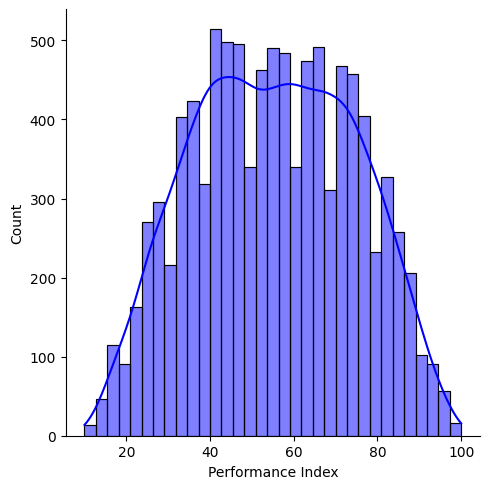

In [ ]:
sns.displot(x='Performance Index',data=Student_Performance_df,kde=True,color='blue');

**From the above Histogram, students Performance Index is mosltly 40-60 percent.**

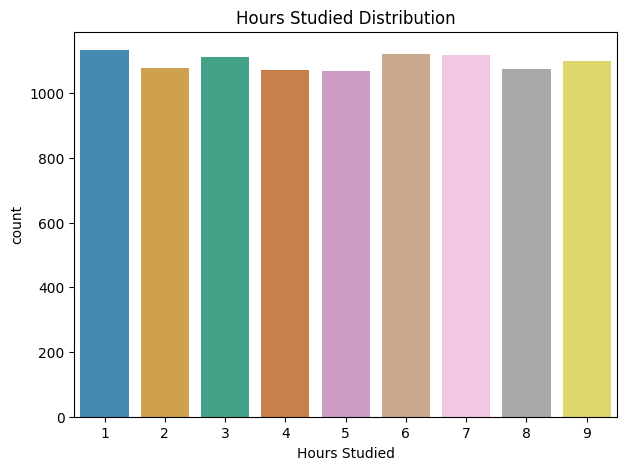

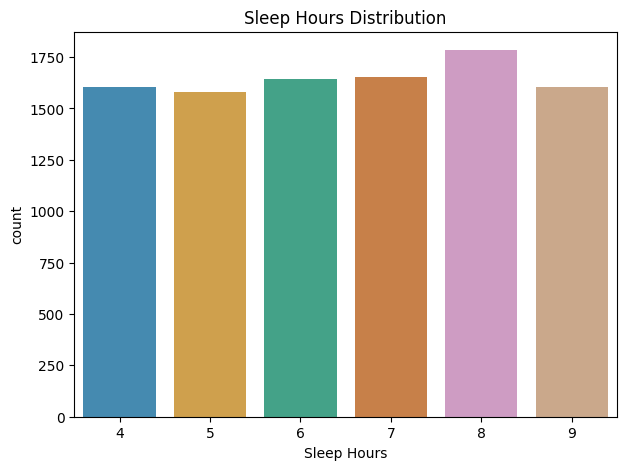

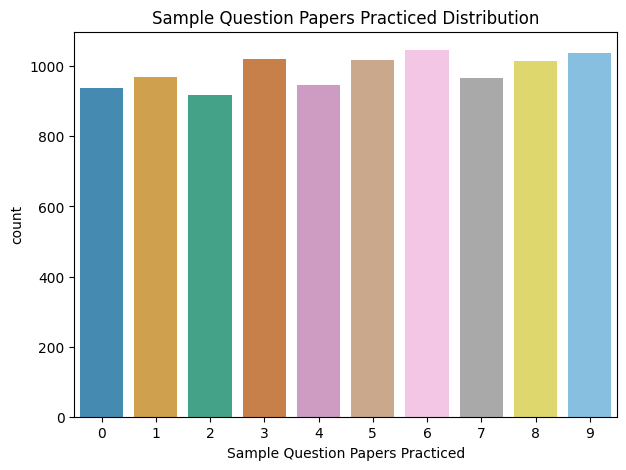

In [ ]:
columns = Student_Performance_df[["Hours Studied","Sleep Hours","Sample Question Papers Practiced"]]

for column in columns:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=column, data=Student_Performance_df, palette="colorblind", alpha=0.8)
    plt.xticks()
    plt.title(f'{column} Distribution')
    plt.show()

**From this:**
>from first figer  
*   Most student studied "1" hour
*   Other students studied Similar numbers of hours

>from second figer  
*   Most student Sleep 8 hours
*  Other students sleep Similar numbers of hours

>from third figer

 * All student have Similar The number of sample question papers the practiced.
 * There are students who did not practice any questions



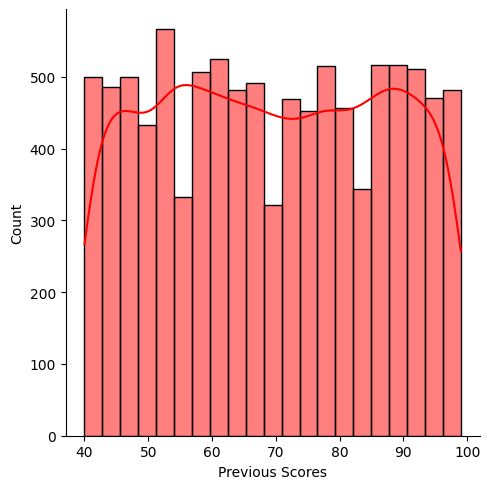

In [ ]:
sns.displot(x='Previous Scores',data=Student_Performance_df,color='red',kde=True);

**From the above Histogram, that most of the students got Previous Scores in between 50-60**

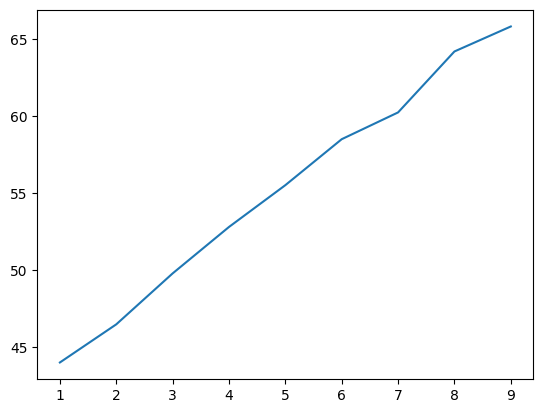

In [ ]:
avg_performance_by_hours = Student_Performance_df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

**The more hours you sleep, Performance index increase>> this Strong Positive Relationship**

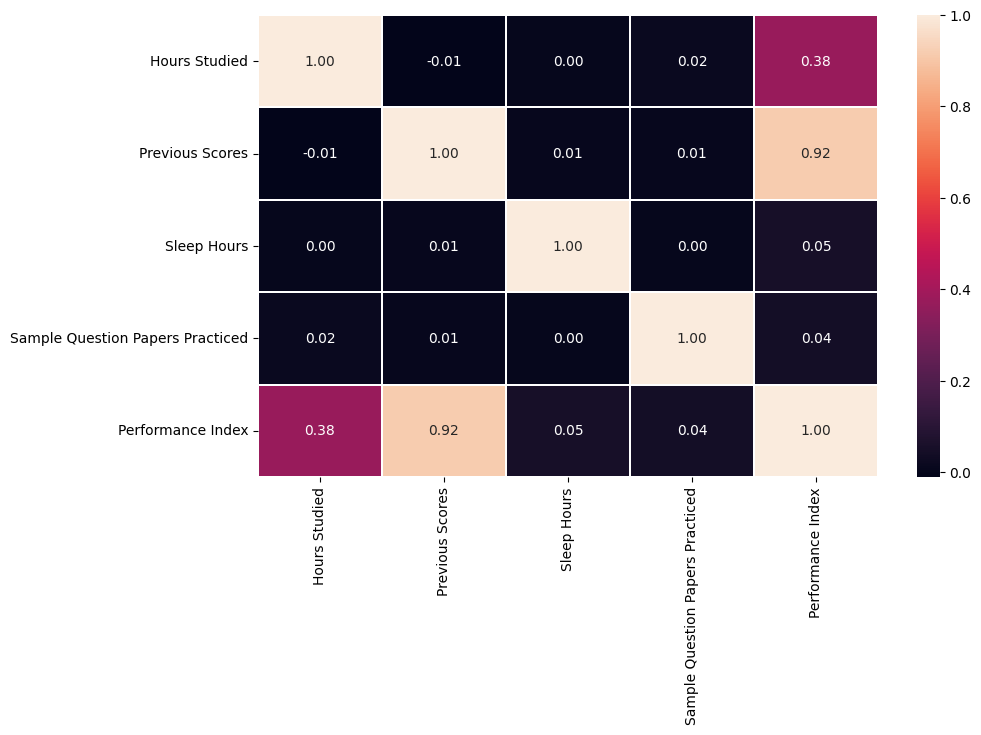

In [ ]:

plt.figure(figsize = (10,6))
sns.heatmap(Student_Performance_df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

**There's a lot of Strong Positive Relationships between Performance Index and Features**

###Data Preprocessing

In [ ]:

encoder = LabelEncoder()

Student_Performance_df["Extracurricular Activities"] =  encoder.fit_transform(Student_Performance_df["Extracurricular Activities"])

In [ ]:
Student_Performance_df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
5474,9,78,0,4,8,72.0
9470,3,45,1,7,7,26.0
2018,8,76,1,6,5,72.0
7187,7,92,0,9,9,84.0
2577,9,52,0,4,3,45.0


In [ ]:
# Splitting data into Indipendent and Dependent Variable

Train = Student_Performance_df.drop(columns = "Performance Index")
Target = Student_Performance_df["Performance Index"]

In [ ]:
Train.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
5166,4,80,0,5,5
4137,5,60,0,8,8
4494,5,66,0,4,2
554,1,58,0,8,0
3470,1,99,1,7,3


In [ ]:
Target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [ ]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (7898, 5)
y_train shape:  (7898,)
x_test shape:  (1975, 5)
y_test shape:  (1975,)


####Modeling

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.9887391160677558

In [ ]:

# see predicted value
predict = np.round(model.predict(X_test), decimals = 1)
predict

array([46.5, 80.3, 61.1, ..., 77.1, 86.2, 35.9])

In [ ]:
# Real Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6099,47.0,46.5
106,76.0,80.3
9265,62.0,61.1
4707,23.0,22.7
2155,76.0,74.8
...,...,...
8732,19.0,18.3
3112,39.0,40.3
5297,77.0,77.1
6116,88.0,86.2


#####Model Predictions On User Input

In [ ]:
Student_Performance_df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
x_input = [4,82,0,4,2]
predictions = model.predict([x_input])[0]
print("Performance Index for given Data:",predictions)

Performance Index for given Data: 63.199751750315485


In [ ]:
x_input = [10,85,1,7,3]
predictions = model.predict([x_input])[0]
print("Performance Index for given Data:",predictions)

Performance Index for given Data: 85.5399206719872


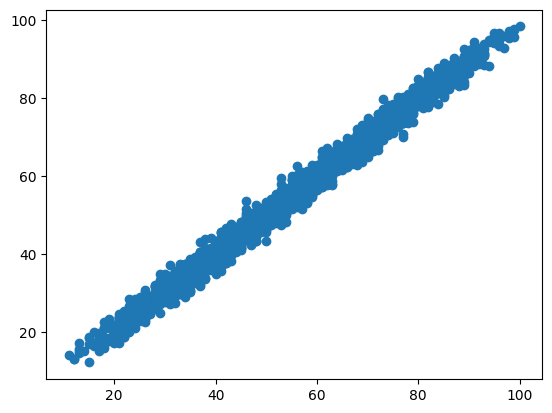

In [ ]:
##visualize the relationship between the actual target values (y_test) and the predicted values (predict)
plt.scatter(y_test, predict)
plt.show()

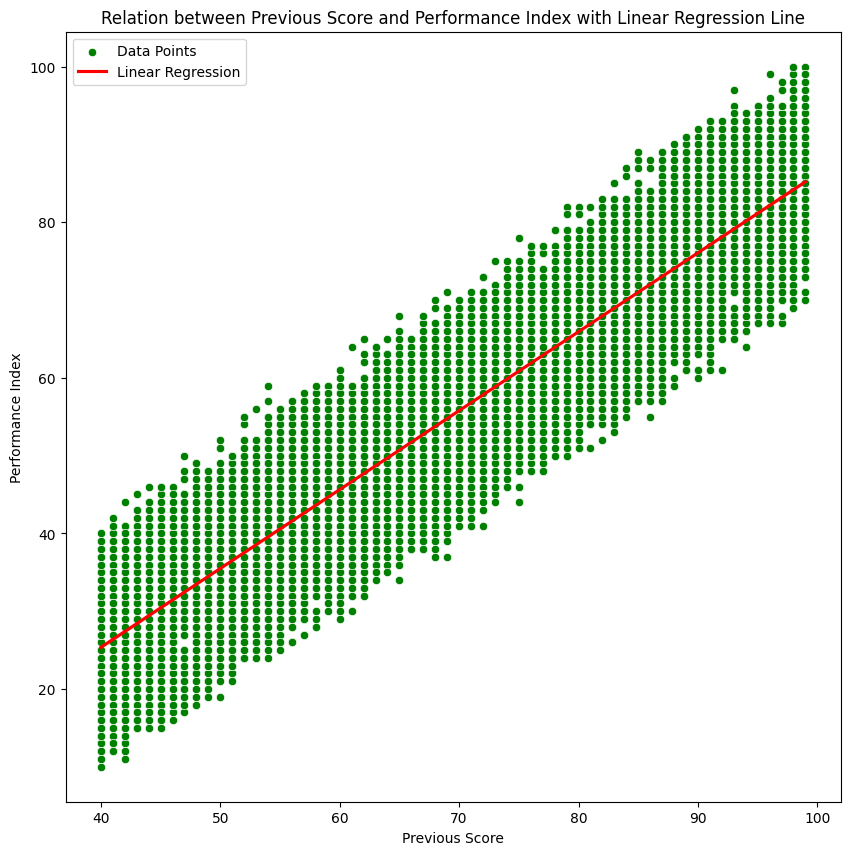

In [ ]:
prev_score = Student_Performance_df['Previous Scores']
per = Student_Performance_df['Performance Index']
plt.figure(figsize=(10, 10))
sns.scatterplot(x=prev_score, y=per, color='green', label='Data Points')
sns.regplot(x=prev_score, y=per, scatter=False, color='red', label='Linear Regression')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.title('Relation between Previous Score and Performance Index with Linear Regression Line')
plt.legend()
plt.show()

In [ ]:
# see mean absolute error
mean_absolute_error(y_test,predict)

1.6469367088607596

In [ ]:
model.coef_

array([2.8510219 , 1.01843034, 0.57382297, 0.47207329, 0.18870366])

In [ ]:

# see y intercept
model.intercept_

-33.981324496440635

Equation of our multiple linear regression model is :


*   2.85 × Hours Studied + 1.02 × Previous Scores + 0.61 × Extracurricular Activities + 0.48 × Sleep Hours + 0.19 × Sample Question Papers Practiced - 33.92




In [ ]:
r2_score(y_test,predict)
# see coefficients values

0.9884215285728708

>**0.988 suggests that predicts done by the model is 98% accurate.**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains true target values and y_pred contains predicted values
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mean_squared_error(y_test, predict, squared=False)  # squared=False calculates RMSE
r2 = r2_score(y_test, predict)

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R-squared Score: {r2:.3f}')


MAE: 1.647
MSE: 4.309
RMSE: 2.076
R-squared Score: 0.988


###Using polynomial Regression :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

##perform polynomial regression with grid search for hyperparameter tuning
poly_features = PolynomialFeatures(include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(poly_reg, param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("\nBest Hyperparameters for Polynomial Regression:", best_params)
print("Best R-squared Score (Polynomial Regression):", best_score * 100)

# Evaluate best model on test set
best_poly_model = grid_search.best_estimator_
y_pred_poly = best_poly_model.predict(X_test_poly)
poly_test_score = r2_score(y_test, y_pred_poly)
print("\nTest R-squared (Polynomial Regression):", poly_test_score)



Best Hyperparameters for Polynomial Regression: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best R-squared Score (Polynomial Regression): 98.86977438444838

Test R-squared (Polynomial Regression): 0.9884396248985767


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)

# Calculate R-squared for linear regression
linear_train_r2 = r2_score(y_train, linear_train_pred)
linear_test_r2 = r2_score(y_test, linear_test_pred)

# Calculate MAE, MSE, RMSE for linear regression
linear_mae = mean_absolute_error(y_test, linear_test_pred)
linear_mse = mean_squared_error(y_test, linear_test_pred)
linear_rmse = np.sqrt(linear_mse)

print("Linear Regression Train R-squared:", linear_train_r2)
print("Linear Regression Test R-squared:", linear_test_r2)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression MSE:", linear_mse)
print("Linear Regression RMSE:", linear_rmse)

# Polynomial Regression
degree = 2  # Choose the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_test_pred = poly_model.predict(X_test_poly)

# Calculate R-squared for polynomial regression
poly_test_r2 = r2_score(y_test, poly_test_pred)

# Calculate MAE, MSE, RMSE for polynomial regression
poly_mae = mean_absolute_error(y_test, poly_test_pred)
poly_mse = mean_squared_error(y_test, poly_test_pred)
poly_rmse = np.sqrt(poly_mse)

print("\nPolynomial Regression Test R-squared:", poly_test_r2)
print("Polynomial Regression MAE:", poly_mae)
print("Polynomial Regression MSE:", poly_mse)
print("Polynomial Regression RMSE:", poly_rmse)


Linear Regression Train R-squared: 0.9887391160677558
Linear Regression Test R-squared: 0.9884301209927054
Linear Regression MAE: 1.6469703984255573
Linear Regression MSE: 4.305900938538479
Linear Regression RMSE: 2.0750664901488047

Polynomial Regression Test R-squared: 0.9884320145272996
Polynomial Regression MAE: 1.6467860751154748
Polynomial Regression MSE: 4.305196231740668
Polynomial Regression RMSE: 2.074896679774843


In [ ]:

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# Experiment with different polynomial degrees
degrees = [2, 3, 4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Train polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Evaluate polynomial regression model
    poly_pred = poly_model.predict(X_test_poly)
    poly_r2 = r2_score(y_test, poly_pred)
    poly_mae = mean_absolute_error(y_test, poly_pred)
    poly_mse = mean_squared_error(y_test, poly_pred)
    poly_rmse = np.sqrt(poly_mse)

    # Print or store results for analysis
    print(f"Polynomial Degree {degree}:")
    print("R-squared:", poly_r2)
    print("MAE:", poly_mae)
    print("MSE:", poly_mse)
    print("RMSE:", poly_rmse)

# Hyperparameter tuning and experimentation for both linear and polynomial regression
# Use GridSearchCV or manual tuning with loops to vary hyperparameters and evaluate model performance


Polynomial Degree 2:
R-squared: 0.9884320145272996
MAE: 1.6467860751154753
MSE: 4.305196231740661
RMSE: 2.0748966797748416
Polynomial Degree 3:
R-squared: 0.9883831180754841
MAE: 1.647176518336975
MSE: 4.323393766704606
RMSE: 2.07927722218674
Polynomial Degree 4:
R-squared: 0.9883292440250551
MAE: 1.6507175053078367
MSE: 4.343443788330466
RMSE: 2.0840930373499322


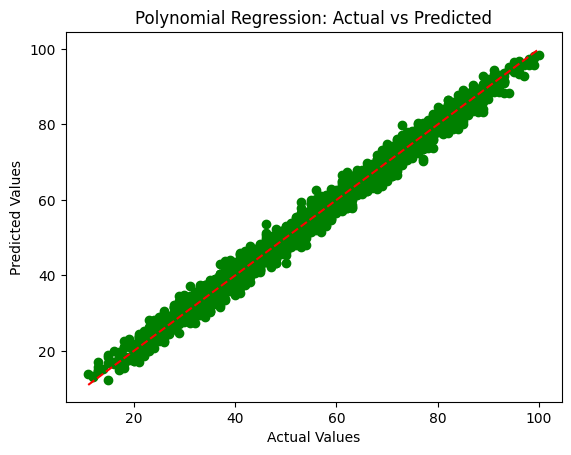

In [ ]:
# Plotting polynomial regression predictions vs actual values for test data
plt.scatter(y_test, poly_test_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()


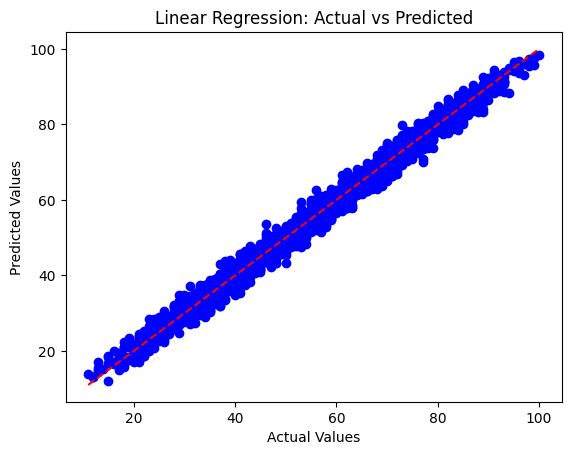

In [ ]:
import matplotlib.pyplot as plt

# Plotting linear regression predictions vs actual values for test data
plt.scatter(y_test, linear_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define pipeline
polynomial_features = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([
    ("poly_features", polynomial_features),
    ("linear_reg", linear_regression)
])

# Define hyperparameters grid
param_grid = {
    "poly_features__degree": [2, 3, 4],
    "linear_reg__fit_intercept": [True, False],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate best model
test_score = best_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Test R-squared (Best Model):", test_score)


Best Parameters: {'linear_reg__fit_intercept': False, 'poly_features__degree': 2}
Test R-squared (Best Model): 0.9884320145273005


Test R-squared (Polynomial Regression): 0.9883831180754868


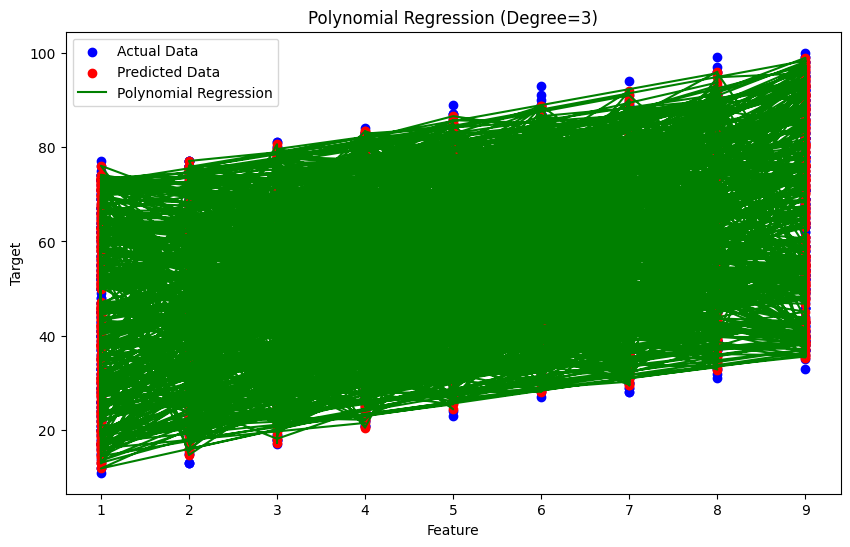

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have X_train, X_test, y_train, y_test and polynomial degree selected

# Fit polynomial regression model
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predict on test data
y_pred_poly = poly_reg.predict(X_poly_test)

# Calculate R-squared for test data
test_score_poly = r2_score(y_test, y_pred_poly)
print("Test R-squared (Polynomial Regression):", test_score_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test.iloc[:, 0], y_pred_poly, color='red', label='Predicted Data')
plt.plot(X_test.iloc[:, 0], y_pred_poly, color='green', label='Polynomial Regression')
plt.title('Polynomial Regression (Degree=3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


Best Parameters: {'fit_intercept': True}
Test R-squared (Polynomial Regression): 0.9883831180754868


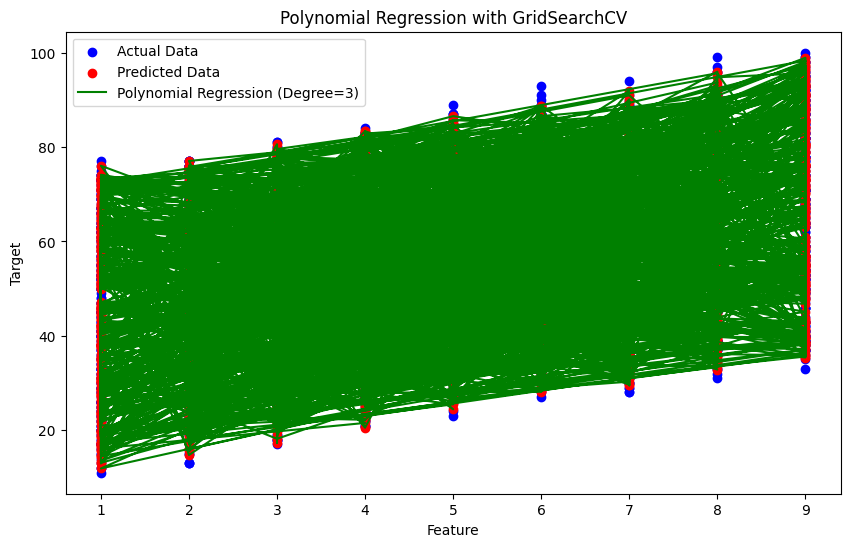

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Assuming you have X_train, X_test, y_train, y_test and polynomial degree selected

# Define the polynomial degree and parameters for GridSearchCV
poly_degree = 3
param_grid = {'fit_intercept': [True, False]}

# Create polynomial features
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initialize linear regression model
poly_reg = LinearRegression()

# Perform grid search for best hyperparameters
grid_search = GridSearchCV(poly_reg, param_grid, cv=5)
grid_search.fit(X_poly_train, y_train)

# Get best model and parameters
best_poly_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on test data using the best model
y_pred_poly = best_poly_reg.predict(X_poly_test)

# Calculate R-squared for test data
test_score_poly = r2_score(y_test, y_pred_poly)
print("Test R-squared (Polynomial Regression):", test_score_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test.iloc[:, 0], y_pred_poly, color='red', label='Predicted Data')
plt.plot(X_test.iloc[:, 0], y_pred_poly, color='green', label='Polynomial Regression (Degree=3)')
plt.title('Polynomial Regression with GridSearchCV')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


Using DecisionTreeRegressor And RandomForestRegressor:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(max_depth=5)  # Example hyperparameter
dt_regressor.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate Decision Tree model
dt_r2 = r2_score(y_test, y_pred_dt)
print("R-squared (Decision Tree):", dt_r2)

# Create and train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5)  # Example hyperparameters
rf_regressor.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate Random Forest model
rf_r2 = r2_score(y_test, y_pred_rf)
print("R-squared (Random Forest):", rf_r2)
